In [15]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#Pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#For Buiilding the Model
#from kneed import KneeLocator
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans



### Loading and Pre-processing data

In [16]:
### Load the data
df = pd.read_csv("song_data.csv", index_col = 0)
print("Size of the data:", df.shape)
df.tail(n=100)

Size of the data: (18835, 14)


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
Shrike,72,300706,0.464,0.387,0.278,0.005270,7,0.102,-8.454,0,0.0318,153.426,3,0.0632
Chemicals,72,199906,0.885,0.608,0.238,0.125000,0,0.111,-13.604,1,0.0434,78.013,4,0.2700
People Change,69,212853,0.884,0.374,0.276,0.012300,7,0.122,-14.945,1,0.0353,80.169,4,0.4120
Thousand (feat. Lisa Hannigan),69,206440,0.943,0.676,0.198,0.013200,1,0.104,-13.910,1,0.0333,118.004,4,0.1250
Old Friend,69,148200,0.811,0.412,0.241,0.392000,3,0.114,-13.477,1,0.0295,100.979,4,0.3740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Let It Breathe,60,159645,0.893,0.500,0.151,0.000065,11,0.111,-16.107,1,0.0348,113.969,4,0.3000
Answers,60,205666,0.765,0.495,0.161,0.000001,11,0.105,-14.078,0,0.0301,94.286,4,0.2650
Sudden Love (Acoustic),23,182211,0.847,0.719,0.325,0.000000,0,0.125,-12.222,1,0.0355,130.534,4,0.2860


I decided to do two things in here. I am not sure whether to include the song popularity as one of the features given that we highlighted it on the proposal or just exclude it when training the dataset and use it later. So, I decided to create two datasets for that and compare. But it is really mostly based on hopw we understand and interpret our problem.

## Dropping song popularity with other "irrelevant features"
### Using this dataset in getting the k-means

In [17]:
#Filter out features
song_feature = df.drop(['song_popularity','song_duration_ms','time_signature', 'key','audio_mode'], axis = 1)
song_feature.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
song_name,,,,,,,,,
Boulevard of Broken Dreams,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,0.474
In The End,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,0.370
Seven Nation Army,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,123.881,0.324
By The Way,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,0.198
How You Remind Me,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,0.574


array([[<AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>],
       [<AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'loudness'}>],
       [<AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'audio_valence'}>]], dtype=object)

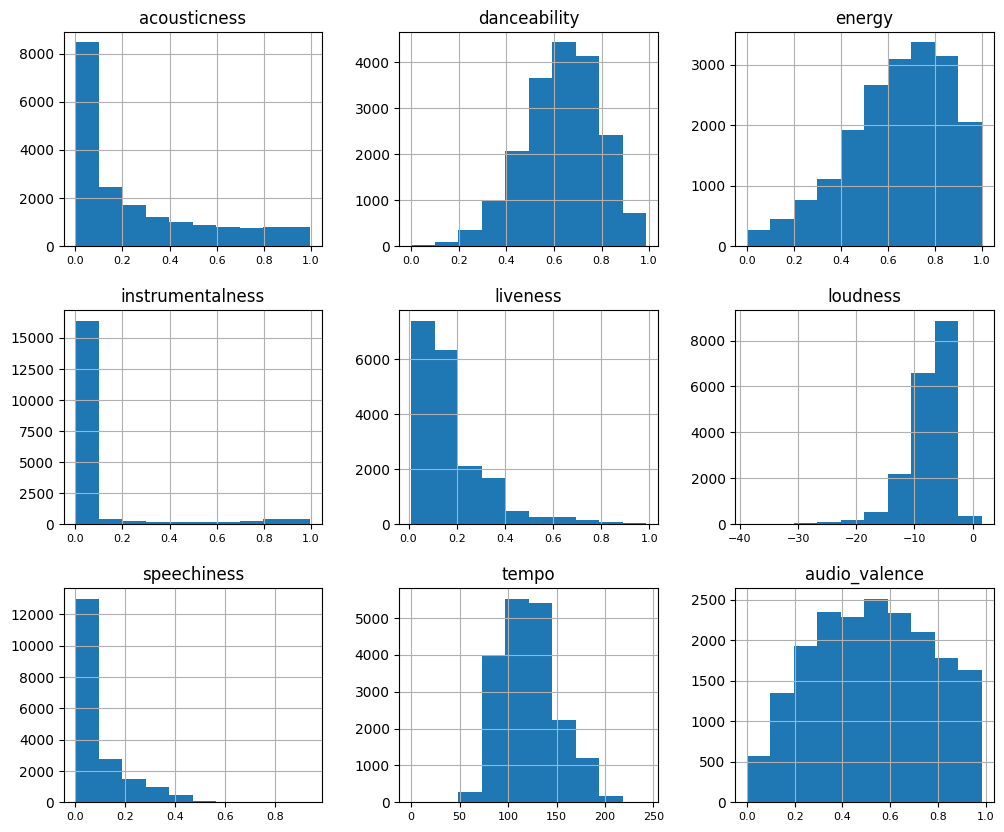

In [18]:
song_feature.hist(xlabelsize=8, figsize=(12,10))

### Descriptive Analysis

In [19]:
song_feature.describe(include='all')


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
count,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,0.258539,0.633348,0.644995,0.078008,0.179650,-7.447435,0.102099,121.073154,0.527967
std,0.288719,0.156723,0.214101,0.221591,0.143984,3.827831,0.104378,28.714456,0.244632
min,0.000001,0.000000,0.001070,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000
25%,0.024100,0.533000,0.510000,0.000000,0.092900,-9.044000,0.037800,98.368000,0.335000
50%,0.132000,0.645000,0.674000,0.000011,0.122000,-6.555000,0.055500,120.013000,0.527000
75%,0.424000,0.748000,0.815000,0.002570,0.221000,-4.908000,0.119000,139.931000,0.725000
max,0.996000,0.987000,0.999000,0.997000,0.986000,1.585000,0.941000,242.318000,0.984000


In [20]:
#Mean, Median, and Mode

print("\n----------- Calculate Mean -----------\n")
print(song_feature.mean())

#song_feature.describe(include='all')


----------- Calculate Mean -----------

acousticness          0.258539
danceability          0.633348
energy                0.644995
instrumentalness      0.078008
liveness              0.179650
loudness             -7.447435
speechiness           0.102099
tempo               121.073154
audio_valence         0.527967
dtype: float64


In [21]:
#Median
print("\n----------- Calculate Median -----------\n")
print(song_feature.median())


----------- Calculate Median -----------

acousticness          0.132000
danceability          0.645000
energy                0.674000
instrumentalness      0.000011
liveness              0.122000
loudness             -6.555000
speechiness           0.055500
tempo               120.013000
audio_valence         0.527000
dtype: float64


In [22]:
# Mode

print("\n----------- Calculate Mode -----------\n")
print(song_feature.mode())


----------- Calculate Mode -----------

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0          0.13         0.687   0.704               0.0     0.108    -4.589   
1           NaN         0.694     NaN               NaN       NaN       NaN   

   speechiness    tempo  audio_valence  
0       0.0337  125.978          0.961  
1          NaN      NaN            NaN  


In [23]:
#Standard Deviation


print(song_feature.std())

acousticness         0.288719
danceability         0.156723
energy               0.214101
instrumentalness     0.221591
liveness             0.143984
loudness             3.827831
speechiness          0.104378
tempo               28.714456
audio_valence        0.244632
dtype: float64


### Standardized data

In [24]:
y_min = np.min(song_feature, axis=0)
y_max = np.max(song_feature, axis=0) 
y_std = (song_feature - y_min)/(y_max- y_min).values
shape = np.shape(y_std)
y_std

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
song_name,,,,,,,,,
Boulevard of Broken Dreams,0.005541,0.502533,0.682342,0.000029,0.049226,0.859242,0.031243,0.689425,0.481707
In The End,0.010340,0.549139,0.853697,0.000000,0.099580,0.801948,0.052922,0.434371,0.376016
Seven Nation Army,0.008202,0.746707,0.462888,0.448345,0.250333,0.766734,0.084166,0.511233,0.329268
By The Way,0.026505,0.456940,0.970940,0.003561,0.093426,0.838352,0.113709,0.505303,0.201220
How You Remind Me,0.000957,0.452888,0.766517,0.000000,0.104707,0.835204,0.033262,0.709856,0.583333
...,...,...,...,...,...,...,...,...,...
Let It Breathe,0.896586,0.506586,0.150241,0.000066,0.102656,0.561569,0.036982,0.470328,0.304878
Answers,0.768072,0.501520,0.160262,0.000001,0.096503,0.611850,0.031987,0.389100,0.269309
Sudden Love (Acoustic),0.850401,0.728470,0.324602,0.000000,0.117014,0.657845,0.037726,0.538689,0.290650


### Using Elbow Method

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

[Text(0.5, 0, 'Cluster Size'), Text(0, 0.5, 'Inertia')]

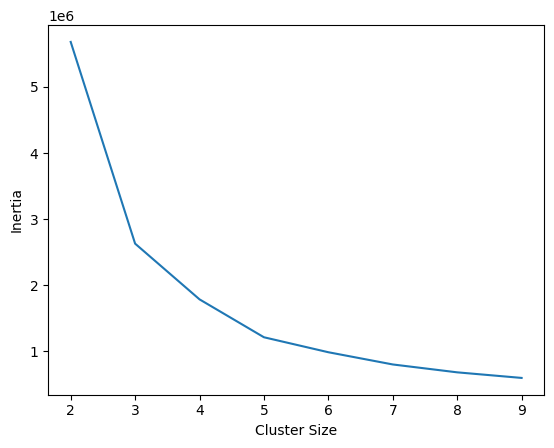

In [25]:
# Determining the cluster size
score = []
for i in range(2,10):
    kmean_model = KMeans(n_clusters=i, random_state=3).fit(song_feature)
    preds = kmean_model.predict(song_feature)
    score.append(kmean_model.inertia_)

# Visualization of different cluster size performations
pd.DataFrame(score, index=range(2, 10)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Inertia")


In [26]:
# Training and Predicting
kmeans_model = KMeans(n_clusters=4, random_state=3).fit(song_feature)
preds = kmeans_model.predict(song_feature)

# Adding predictions to dataframe
song_feature['cluster'] = preds

# Grouping clusters to see the averages
cluster = song_feature \
    .groupby('cluster') \
    .agg('mean')
cluster.head()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
cluster,,,,,,,,,
0,0.222422,0.623001,0.665588,0.081813,0.185117,-7.108729,0.112886,145.454264,0.511894
1,0.313276,0.633882,0.603046,0.078304,0.174365,-7.971244,0.107427,91.420511,0.518995
2,0.222754,0.671623,0.670048,0.078554,0.179651,-7.190291,0.079814,121.095018,0.543824
3,0.259118,0.522703,0.666665,0.067553,0.187329,-7.150924,0.137239,176.622157,0.537866


song_popularity - Cluster 0
acousticness - Cluster 1
danceability - Cluster 0
energy - Cluster 3
instrumentalness - Cluster 2
liveness - Cluster 2
loudness - Cluster 0
speechiness - Cluster - 1
tempo - Cluster 3
audio_valence - Cluster 2

>> The after this I think we can look what songs are included sa cluster with high song popularity and what features yung included sa cluster na to. Pero di talaga ako sure if tama tong ginawa ko based sa pinapagawa ni maam sa atin sa response niya sa email but hopefully it can help even a little.

### Using Silhouette Method

In [27]:
# Generate synthetic data
X, y = make_blobs(n_samples=shape[0], centers=shape[1], random_state=0)

# Create an empty list to store the silhouette scores
scores = []

# Try different values of k
for k in range(2, 10):
    # Cluster the data using K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(X)
    
    # Calculate the silhouette score
    score = silhouette_score(X, clusters)
    
    # Append the score to the list
    scores.append(score)

# Find the index of the highest score
max_index = scores.index(max(scores))

# Create a line plot
plt.plot(range(2, 10), scores)

# Add a vertical line at the position of the highest score
plt.axvline(max_index + 2, color='r', linestyle='--')

# Add grid lines
plt.grid()

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()


NameError: name 'make_blobs' is not defined

In [ ]:
# Training and Predicting
kmeans = KMeans(n_clusters=6, random_state=0).fit(song_feature)
preds = kmeans.predict(song_feature)

# Adding predictions to dataframe
song_feature['cluster'] = preds

# Grouping clusters to see the averages
clusters = song_feature \
    .groupby('cluster') \
    .agg('mean')
clusters.head()

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
cluster,,,,,,,,,,
0,15.109281,0.218659,0.623720,0.681543,0.124959,0.191884,-7.361848,0.095601,137.250138,0.553573
1,49.509192,0.247922,0.656703,0.658789,0.104583,0.181104,-7.536438,0.082807,125.872368,0.526470
2,67.096174,0.290887,0.643948,0.609802,0.066476,0.169646,-7.725783,0.101897,93.235872,0.518180
3,29.994244,0.339368,0.625442,0.601579,0.093972,0.182089,-8.336600,0.109347,92.966517,0.534054
4,74.524621,0.193789,0.667947,0.673097,0.030798,0.178623,-6.496017,0.096508,131.914391,0.516538


song_feature.head(n=100)

### Creating the algorithm using Logistic Regression

#### Independent Variable/s
Cluster (Not sure if we can include the song features to this one especially those included sa study pero they are already been clustered so...)
#### Dependent Variable
Song Popularity